In [211]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil 
import random
import matplotlib.pyplot as plt
%matplotlib inline

# dataset creation

In [212]:
os.chdir('D:/deep learning/data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')  # for creating all file directories
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range (0,10):
        shutil.move(f'{i}', 'train') # every file moved to train file
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)      # 30 files from train to valid 
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        test_samples  = random.sample(os.listdir(f'train/{i}'), 5)           # 5 from train to test
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [213]:
train_path = 'D:/deep learning/data/Sign-Language-Digits-Dataset/train'
valid_path = 'D:/deep learning/data/Sign-Language-Digits-Dataset/valid'
test_path = 'D:/deep learning/data/Sign-Language-Digits-Dataset/test'

In [214]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory= train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory= valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory= test_path, target_size=(224,224), batch_size=10, shuffle = False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


## mobilenet model

In [215]:
mobile = tf.keras.applications.mobilenet.MobileNet() 

In [216]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [217]:
x = mobile.layers[-1].output
output = Dense(units=10, activation= 'softmax')(x)

In [218]:
model = Model(inputs = mobile.input, outputs= output)


In [219]:
# for layer in model.layers[:-23]:
#     layer.trainable = False

In [220]:
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                   

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# train the model

In [221]:
model.compile(optimizer= Adam(lr= 0.0001), loss = 'categorical_crossentropy', metrics= ['accuracy'])
              

C:\Users\nagar\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [222]:
model.fit(x = train_batches, validation_data = valid_batches, epochs = 1, verbose=2)

172/172 - 113s - loss: 2.2532 - accuracy: 0.5742 - val_loss: 2.2285 - val_accuracy: 0.7067 - 113s/epoch - 658ms/step


## test_model

In [223]:
test_labels = test_batches.classes

In [224]:
predictions =  model.predict(x=test_batches, verbose= 0)

rounded_prediction = np.argmax(predictions, axis= -1)

for i in rounded_prediction:
    print (i)

0
0
0
0
0
1
1
2
1
1
2
2
2
2
2
2
2
3
2
3
4
4
4
4
4
5
5
5
5
5
6
6
6
6
6
3
8
4
3
3
3
3
8
3
3
9
9
8
9
8


In [225]:
cm = confusion_matrix(y_true= test_labels, y_pred=predictions.argmax(axis=1))

In [226]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

confusion matrix without normalisation
[[5 0 0 0 0 0 0 0 0 0]
 [0 4 1 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 3 2 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 3 1 0 0 0 1 0]
 [0 0 0 4 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2 3]]


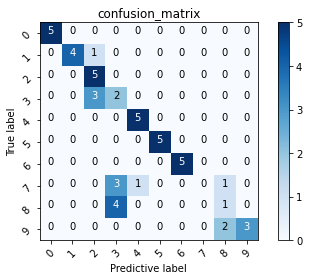

In [227]:
cm_plot_labels = ['0', '1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm= cm, classes = cm_plot_labels, title = 'confusion_matrix')